# INFO-F-422 -  Statistical Foundations of Machine Learning 

### De Vos Sebastien - __[Sebastien.De.Vos@ulb.be](mailto:student1@ulb.ac.be) - Student ID 459907__
### Kalai Tarik - __[Tarik.Kalai@ulb.be](mailto:student2@ulb.ac.be) - Student ID 459631__
### Rubas Diego - __[Diego.Rubas@ulb.be](mailto:student3@ulb.ac.be) - Student ID 459733__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


# Exploratory Data Anaylsis

In this section we will be viewing and understanding the data that we have.

### Data loading

In [62]:
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)
training_set_labels <- read.csv("sample_data/training_set_labels.csv", stringsAsFactors  = T)
test_set_features <- read.csv("sample_data/test_set_features.csv", stringsAsFactors  = T)
submission_format <- read.csv("sample_data/submission_format.csv", stringsAsFactors  = T)
write.csv(submission_format,"sample_data/answers.csv", row.names = FALSE, quote=FALSE)

head(submission_format)

,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<dbl>,<dbl>
1,26707,0.5,0.7
2,26708,0.5,0.7
3,26709,0.5,0.7
4,26710,0.5,0.7
5,26711,0.5,0.7
6,26712,0.5,0.7


### Dimensions of the data samples. 

In [63]:
cat("dimension of test_set_features: ",  dim(test_set_features), "\n")# This will be the input to the model (after it had been trained), the answer the model
#will be providing will then be sent to DrivenData. 

cat("dimension of training_set_labels: ", dim(training_set_labels), "\n") # Answers to training_set_features. 

cat("dimension of training_set_features : ", dim(training_set_features), "\n") # Corresponding to a sample of data: will be used for training set and test set. 
#The result will then be "validated" with a comparison with training_set_labels

dimension of test_set_features:  26708 36 
dimension of training_set_labels:  26707 3 
dimension of training_set_features :  26707 36 


### Data preview

In [64]:
# To generalise the function, we need to take into account the empty answers and not only NA. 
cleanData <- function(x) {
    res <- list()
    for (i in 2:22) {
        x <- transform_na(x, i)
    }
    return(x) #return
}

transform_na <- function(x, index){
    if (length(which(is.na(x[,index]))) > 0) { #Check if there is any NA in the column
            mean_ts <- mean(x[,index], na.rm = T) #compute old_mean
            sd_ts <- sqrt(var(x[,index], na.rm = T)) #compute old_sd
            feature_name <- names(x[index]) #remember the name of the feature we are dealing with
            x[is.na(x[,index]), index] <- round(mean_ts + sd_ts/2) #modify the data
        }
    return(x)
}

norm<-function(x){
    return( (x-min(x)) / (max(x)-min(x)) )
}

one_hot_encoding <- function(x, index) {
    names <- levels(x[,index]) # get the names of all the possible different values
    new_col <- model.matrix(~0+x[,index]) # transforms the column in a matrix with a '1' in the correct column and '0' otherwise
    attr(new_col, "dimnames")[[2]] <- names
    new_col <- as.data.frame(new_col)
    x <- data.frame(x[1:index-1],new_col,x[(index+1):ncol(x)])
    return(x)
}

cast_into_double <- function(x){
    for (i in 2:length(x)){
        x[,i] <- as.double(x[,i])
    }
    return(x)
}

In [65]:
data_sorting <- function(x){
    # for feature 2 -> 22
    x <- cleanData(x)
    # for feature 23
    levels(x[,23]) <- c(1, 2, 3, 4, 5)

    # for feature 24
    levels(x[,24]) <- c(0, 1, 2, 4, 3)

    # for feature 25
    x <- one_hot_encoding(x, 25)

    # for feature 26 -> number 29
    x <- one_hot_encoding(x, 29)

    # for feature 27 -> number 31 !!! it need to be changed, it is not a good way to sort this data.
    levels(x[,31]) <- c(0, 2, 1, 3) 

    # for feature 28 -> number 32
    levels(x[,32])[1] <- 'marital_status_not_specified'
    x <- one_hot_encoding(x, 32)

    # for feature 29 -> number 35
    levels(x[,35])[1] <- 'rental_not_specified'
    x <- one_hot_encoding(x, 35)

    #for features 30 -> number 38
    levels(x[,38])[1] <- 'employment_not_specified'
    x <- one_hot_encoding(x, 38)
    
    # for feature 31 -> 42, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -42)

    # for feature 32 -> 42 (since we dropped last column
    x <- one_hot_encoding(x, 42)

    # for feature 33 -> 45
    x <- transform_na(x, 45)

    # for feature 34 -> 46
    x <- transform_na(x, 46)

    # for feature 35 -> 47, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -47)

    # for feature 36 -> 47, we judged its contribution was negligeable against its cost of implementation
    x <- subset(x, select = -47)



    x <- cast_into_double(x)
    name <- names(x)[-1]
    temp <- apply(x[2:length(x)], 2 , norm)
    attr(temp, "dimnames")[[2]] <- name
    x <- data.frame(x[1],as.data.frame(temp))
    return (x)
}

training_set_features <- data_sorting(training_set_features)
test_set_features <- data_sorting(test_set_features)


head(training_set_features[1:46])
dim(training_set_features)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,⋯,Rent,employment_not_specified,Employed,Not.in.Labor.Force,Unemployed,MSA..Not.Principle..City,MSA..Principle.City,Non.MSA,household_adults,household_children
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.3333333,0.0,0,0,0,0,0,1,1,⋯,0,0,0,1,0,0,0,1,0.0000000,0
2,1,1.0000000,1.0,0,1,0,1,0,1,1,⋯,1,0,1,0,0,1,0,0,0.0000000,0
3,2,0.3333333,0.5,0,1,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0.6666667,0
4,3,0.3333333,0.5,0,1,0,1,1,0,0,⋯,1,0,0,1,0,0,1,0,0.0000000,0
5,4,0.6666667,0.5,0,1,0,1,1,0,1,⋯,0,0,1,0,0,1,0,0,0.3333333,0
6,5,1.0000000,0.5,0,1,0,1,0,0,1,⋯,0,0,1,0,0,0,1,0,0.6666667,1


[1] 26707    46

In [66]:
# par(mfrow=c(1,3))

# # data_to_plot <- table(training_set_features["h1n1_concern"])
# # data_to_plot <- table(t(training_set_features["h1n1_knowledge"]))

# names<-names(training_set_features)
# for(i in 2:length(names)){
#     barplot(table(training_set_features[names[i]]), col="blue", main=names[i],beside=T) 
# }

In [67]:
# # head(training_set_labels)
# # plot(training_set_labels$h1n1_vaccine, training_set_labels$seasonal_vaccine)

# training_set_features[1] <- training_set_labels[2]
# plot(training_set_features[1:3]) #Why is the plot so strange ?? 
# X1 <- as.matrix(training_set_features[1])
# X2 <- as.matrix(training_set_features[2])
# X3 <- as.matrix(training_set_features[3])
# regression <- lm( X1~ X2 + X3)

# summary(regression)

# Data preprocessing

## Missing value imputation

## Feature engineering

## Feature selection



# Model selection



## Model 1


## Model 2

In [68]:
spam <- data.frame(training_set_features[2:length(training_set_features)], training_set_labels[2]) 
head(spam)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,⋯,employment_not_specified,Employed,Not.in.Labor.Force,Unemployed,MSA..Not.Principle..City,MSA..Principle.City,Non.MSA,household_adults,household_children,h1n1_vaccine
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.3333333,0.0,0,0,0,0,0,1,1,0,⋯,0,0,1,0,0,0,1,0.0000000,0,0
2,1.0000000,1.0,0,1,0,1,0,1,1,0,⋯,0,1,0,0,1,0,0,0.0000000,0,0
3,0.3333333,0.5,0,1,0,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0.6666667,0,0
4,0.3333333,0.5,0,1,0,1,1,0,0,0,⋯,0,0,1,0,0,1,0,0.0000000,0,0
5,0.6666667,0.5,0,1,0,1,1,0,1,0,⋯,0,1,0,0,1,0,0,0.3333333,0,0
6,1.0000000,0.5,0,1,0,1,0,0,1,0,⋯,0,1,0,0,0,1,0,0.6666667,1,0


In [69]:
library(rpart)
spam <- data.frame(training_set_features[2:length(training_set_features)], training_set_labels[2])
spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)
type <- names(spam)[length(spam)]
type

train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]

model <- rpart(form=h1n1_vaccine ~ ., method="class", data=train_data)

Y_pred <- predict(model,test_set_features)
submission_format[2] <- Y_pred[,2]

spam <- data.frame(training_set_features[2:length(training_set_features)], training_set_labels[3])
spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)
type <- names(spam)[length(spam)]
type

train_data <- spam[spam_idx[1:half_split],]
test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]

model <- rpart(form=seasonal_vaccine ~ ., method="class", data=train_data)
Y_pred <- predict(model,test_set_features)
submission_format[3] <- Y_pred[,2]
head(submission_format)

write.csv(submission_format,"sample_data/answers.csv", row.names = FALSE, quote=FALSE)


[1] "h1n1_vaccine"

[1] "seasonal_vaccine"

,respondent_id,h1n1_vaccine,seasonal_vaccine
,<int>,<dbl>,<dbl>
1,26707,0.1319720,0.3832200
2,26708,0.1319720,0.2210132
3,26709,0.1319720,0.7826235
4,26710,0.4119874,0.7826235
5,26711,0.1319720,0.7424893
6,26712,0.1319720,0.7424893



Classification tree:
rpart(formula = seasonal_vaccine ~ ., data = train_data, method = "class")

Variables actually used in tree construction:
[1] age_group                   doctor_recc_seasonal       
[3] health_worker               opinion_seas_risk          
[5] opinion_seas_vacc_effective

Root node error: 6200/13353 = 0.46432

n= 13353 

        CP nsplit rel error  xerror      xstd
1 0.319194      0   1.00000 1.00000 0.0092952
2 0.032419      1   0.68081 0.68452 0.0086784
3 0.011129      3   0.61597 0.62097 0.0084427
4 0.010000      6   0.57548 0.59419 0.0083305
Call:
rpart(formula = seasonal_vaccine ~ ., data = train_data, method = "class")
  n= 13353 

          CP nsplit rel error    xerror        xstd
1 0.31919355      0 1.0000000 1.0000000 0.009295202
2 0.03241935      1 0.6808065 0.6845161 0.008678445
3 0.01112903      3 0.6159677 0.6209677 0.008442666
4 0.01000000      6 0.5754839 0.5941935 0.008330469

Variable importance
          opinion_seas_risk opinion_seas_vacc_ef

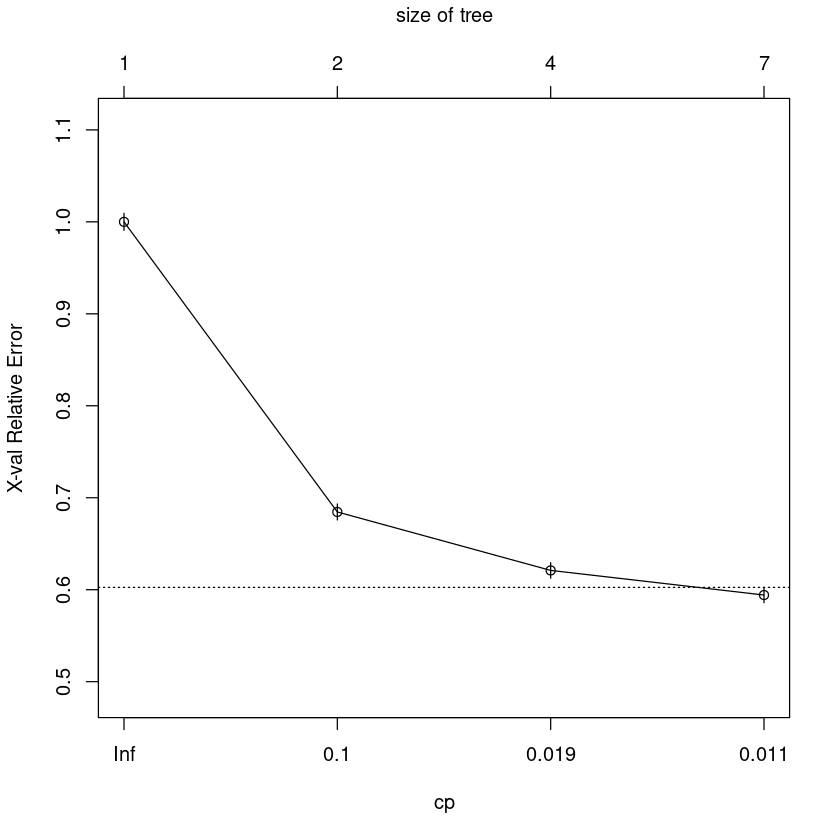

In [70]:
printcp(model) # display the results
plotcp(model) # visualize cross-validation results
summary(model) # detailed summary of splits

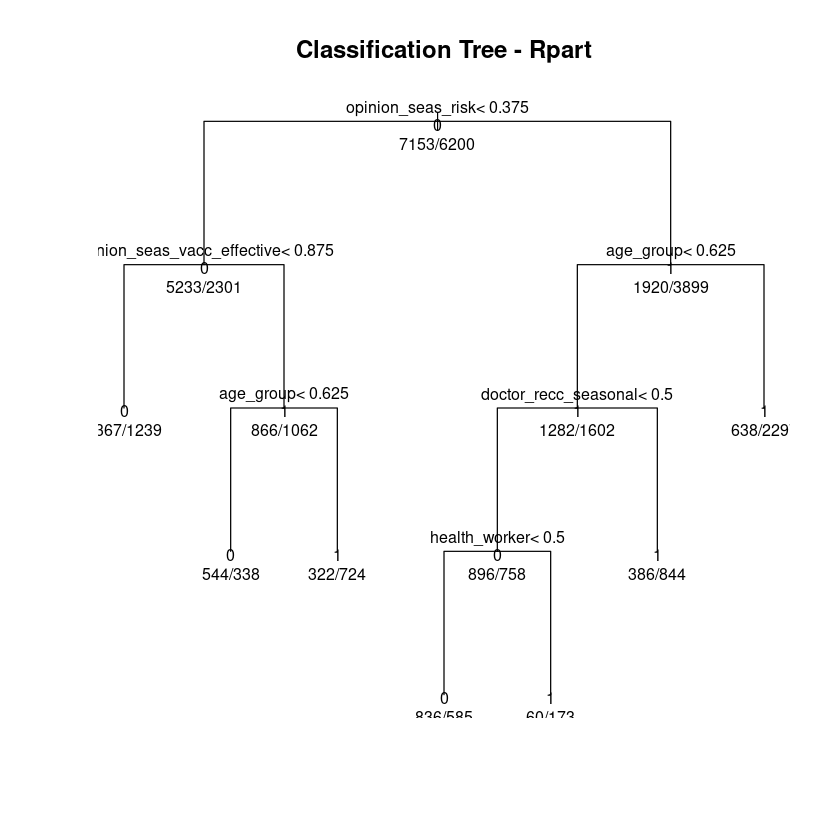

In [71]:
# plot tree
plot(model, uniform=TRUE,
   main="Classification Tree - Rpart")
text(model, use.n=TRUE, all=TRUE, cex=.8)

In [72]:
data.frame(model$variable.importance)

,model.variable.importance
,<dbl>
opinion_seas_risk,873.036050
opinion_seas_vacc_effective,520.205811
opinion_h1n1_risk,391.883513
age_group,241.446297
opinion_h1n1_sick_from_vacc,143.580598
h1n1_concern,120.625706
opinion_seas_sick_from_vacc,117.475035
household_children,109.317938
Not.in.Labor.Force,96.093207



## Model 3


Installing package into ‘/home/seb/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.



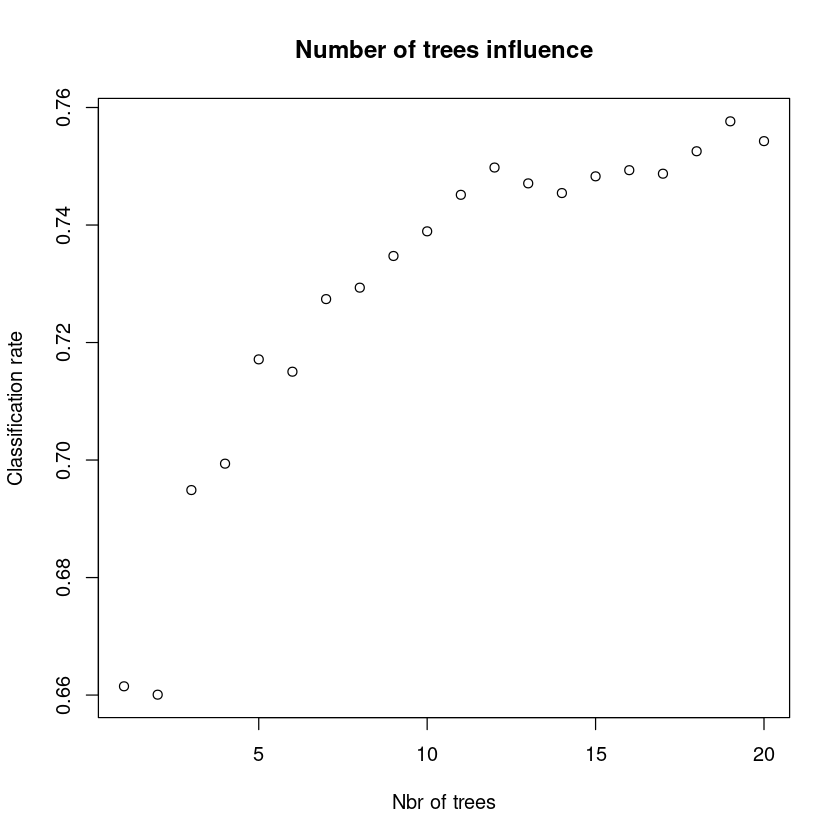

In [75]:
library("randomForest")
n_trees <- 20
accuracy_vec <- array(0,n_trees)

spam_idx <- sample(1:nrow(spam))
half_split <- floor(nrow(spam)/2)
target_variable <- ncol(spam)

for (i in 1:n_trees){ #print(i)
    #3.1 Take the first half of the dataset as a training data set
    train_data <- spam[spam_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
    test_data <- spam[spam_idx[(half_split+1):nrow(spam)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i)
    
    accuracy_vec[i] = (model$test$confusion[1,1]+model$test$confusion[2,2])/sum(model$test$confusion)
    }

plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")


#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  
\begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions